In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime



[0.45, 0.56, 0.4, 0.99, 0.25, 0.46, 0.01, 0.0, 0.13, 0.0, 0.0, 0.18, 0.05, 0.07, 0.01, 0.4, 0.01, 0.0, 0.0, 0.0, 0.0, 0.42, 0.0, 0.04, 0.0, 0.16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 1.24, 0.37, 0.0, 0.43, 0.0, 0.0, 0.0, 0.03, 0.03, 0.0, 0.46, 0.24, 0.58, 0.02, 0.45, 0.32, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.31, 0.24, 0.42, 0.48, 0.51, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.9, 0.17, 0.0, 0.0, 0.0, 0.01, 0.0, 0.49, 0.22, 0.07, 0.0, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.01, 0.0, 0.0, 0.01, 0.01, 0.05, 0.0, 0.0, 0.0, 0.95, 0.85, 0.06, 0.22, 0.13, 0.49, 0.23, 0.11, 0.04, 0.01, 0.02, 0.01, 0.08, 0.88, 0.14, 0.03, 0.1, 0.31, 0.0, 0.0, 0.0, 0.2, 0.0, 0.76, 0.16, 0.16, 0.27, 0.03, 0.0, 0.0, 0.0, 0.0, 0.37, 0.63, 0.16, 0.0, 0.17, 0.11, 0.31, 0.23, 1.03, 0.0, 0.0, 0.0, 0.02, 0.19, 0.0, 0.07, 0.0, 0.07, 0.04, 0.02, 0.19, 1.09, 0.07, 0.02, 0.1, 0.01, 0.0, 0.36, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.01, 0.11, 0.0, 0.2, 0.38, 0.14, 0.

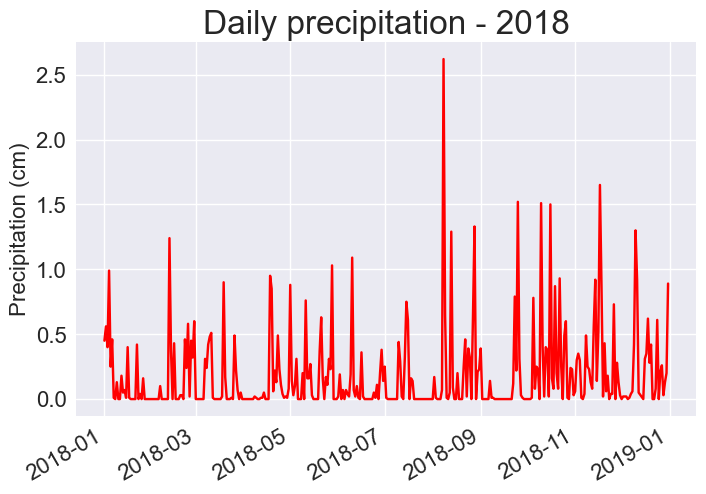

In [12]:
filename = 'data/sitka_weather_2018_simple.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    # get dates, high, and low temperatures from this file.
    dates, precipitation = [], []
    for row in reader:
        current_date = datetime.strptime(row[2], '%Y-%m-%d')
        daily_precip = float(row[3])
        dates.append(current_date)
        precipitation.append(daily_precip)
        
print(precipitation)
#plot the high temperatures
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(dates, precipitation, c='red')

#format plot
ax.set_title('Daily precipitation - 2018', fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel('Precipitation (cm)', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)

plt.show()